Doing 10
Doing 10
Doing 11
Doing 12
Doing 13
Doing 14
Doing 15
Doing 16
Doing 17
Doing 18
Doing 19
Doing 20
Doing 21
Doing 22
Doing 23
Doing 24
Doing 25
Doing 26
Doing 27
Doing 28
Doing 29
Doing 30
Doing 31
Doing 32
Doing 33
Doing 34
Doing 35
Doing 36
Doing 37
Doing 38
Doing 39
Doing 40
Doing 41
Doing 42
Doing 43
Doing 44
Doing 45
Doing 46
Doing 47
Doing 48
Doing 49
Doing 50
Doing 51
Doing 52
Doing 53
Doing 54
Doing 55
Doing 56
Doing 57
Doing 58
Doing 59
Doing 60
Doing 61
Doing 62
Doing 10


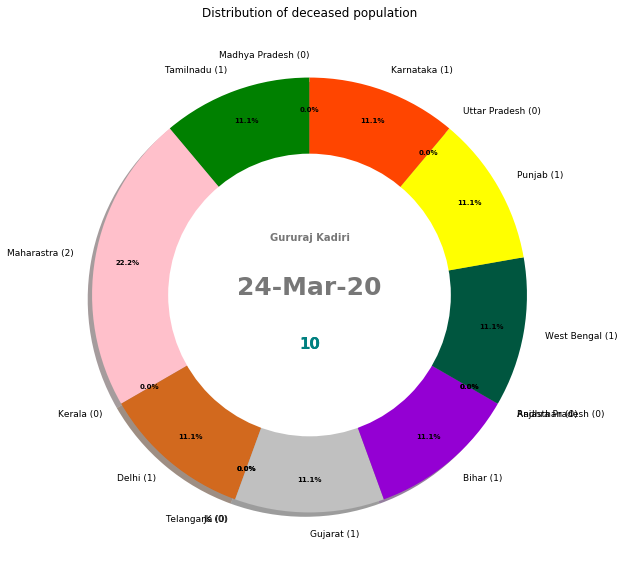

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 11 16:54:16 2020

@author: gururaj
"""

import numpy as np
import pandas as pd
import pandas as pd
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

#fig, ax = plt.subplots(figsize=(18, 8))
fig, ax = plt.subplots(figsize=(10, 10))
states=np.array(['Tamilnadu', 'Maharastra', 'Kerala',
     'Delhi', 'Telangana',"JK",'Gujarat',"Bihar", 'Rajasthan','Andhra Pradesh',"West Bengal","Punjab","Uttar Pradesh","Karnataka",'Madhya Pradesh'])
clrs=['#008000', '#FFC0CB', '#FF0000', '#D2691E',
     '#aafbff', '#0000FF', '#C0C0C0','#9400D3','#306998','#f4c430','#00563f',"#FFFF00","#ACDDDE","#FF4500","#FFFA8D"]
colors = dict(zip(states,clrs))

    

df=pd.read_csv("state_wise_daily.csv",na_values='-')
df.rename(columns={'AP':'Andhra Pradesh','TN':'Tamilnadu','TG':'Telangana','MH':"Maharastra","KL":"Kerala","DL":"Delhi","GJ":"Gujarat","RJ":"Rajasthan","MP":"Madhya Pradesh","UP":"Uttar Pradesh","WB":"West Bengal","PB":"Punjab","JK":"JK","BR":"Bihar","KA":"Karnataka","TT":"India"},inplace=True)
df_cases=df[df["Status"]=="Confirmed"]
df_dead=df[df["Status"]=="Deceased"]
df_recovered=df[df["Status"]=="Recovered"]

df2_cases=df_cases.loc[:,df.columns[1:]]
df2_cases=df2_cases.cumsum(axis=0)
df2_cases.fillna(0,inplace=True)

df2_dead=df_dead.loc[:,df.columns[1:]]
df2_dead=df2_dead.cumsum(axis=0)
df2_dead.fillna(0,inplace=True)

df2_recovered=df_recovered.loc[:,df.columns[1:]]
df2_recovered=df2_recovered.cumsum(axis=0)
df2_recovered.fillna(0,inplace=True)

def draw_dead_percent(index):
    print("Doing "+str(index))
    global states
    ax.clear()
    dead=df2_dead[states].loc[3*index+2]
    cases=df2_cases[states].loc[3*index]
    dead=np.divide(dead*100,cases)
    dead[np.isnan(dead)]=0
    #return(active)
    
    sort=np.argsort(dead).to_list()
    states=states[sort]
    dead=dead[sort]
    
    date=df_cases["Date"].loc[3*index]
    plt.title("Percent of deceased ")
    for i, (value, name) in enumerate(zip(dead, states)):
        
        ax.text(0.5, i-0.25,     str(round(value,2))+"%",ha='left',size=15)
        ax.text(0, i,     name,            ha='right',size=13)
    
    #ax.axvline(x=ind_count,color="#000000")
    ax.barh(states,dead,color=[colors[state] for state in states])
    ax.text(1, 0.4, "Date: "+str(date), transform=ax.transAxes, color='#777777', size=25, ha='right', weight=800)
    #ax.text(1, 0.2, "India: "+str(ind_count)+"%", transform=ax.transAxes, color='#FF1493', size=15, ha='right', weight=800)
    ax.text(0, 1.06, 'Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    plt.box(False)
    plt.tight_layout()




def race_recovery_percent(index):
    global states
    print("Doing "+str(index))
    ax.clear()
    cases=df2_cases[states].loc[3*index]
    dead=df2_dead[states].loc[3*index+2]
    recovered=df2_recovered[states].loc[3*index+1]
    active=(cases-(dead+recovered))
    active=np.divide(recovered*100,cases)
    active[np.isnan(active)]=0
    tot_rec=np.divide(df2_recovered["India"].loc[3*index+1]*100,df2_cases["India"].loc[3*index])
    #return(active)
    sort=np.argsort(cases).to_list()
    sort=np.argsort(active).to_list()
    states=states[sort]
    active=active[sort]
    date=df_cases["Date"].loc[3*index]
    plt.title("Percent of infected people recovered")
    for i, (value, name) in enumerate(zip(active, states)):
        
        ax.text(value+1, i,     str(round(value,2))+"%",           ha='left',size=15)
        ax.text(0, i,     name,            ha='right',size=13)
    ind_count=round(tot_rec,2)
    ax.axvline(x=ind_count,color="#000000")
    ax.barh(states,active,color=[colors[state] for state in states])
    ax.text(1, 0.4, "Date: "+str(date), transform=ax.transAxes, color='#777777', size=25, ha='right', weight=800)
    ax.text(1, 0.2, "India: "+str(ind_count)+"%", transform=ax.transAxes, color='#FF1493', size=15, ha='right', weight=800)
    ax.text(0, 1.06, 'Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    plt.box(False)
def Pie_Active_Fraction(index):
    print("Doing "+str(index))
    global states
    global clrs
    ax.clear()
    plt.title("Distribution of Active Cases")
    cases=df2_cases[states].loc[3*index]
    dead=df2_dead[states].loc[3*index+2]
    recovered=df2_recovered[states].loc[3*index+1]
    active=(cases-(dead+recovered))
    actv=active
    
    
    tot_rec=df2_recovered["India"].loc[3*index+1]
    tot_cases=df2_cases["India"].loc[3*index]
    tot_dead=df2_dead["India"].loc[3*index+2]
    tot_act=tot_cases-(tot_dead+tot_rec)
    active=np.divide(active*100,tot_act)
    
    date=df_cases["Date"].loc[3*index]
    
    ind_count=round(tot_rec,2)
    st=[]
    for i in range(len(states)):
        st.append(states[i]+" ("+str(int(actv[i]))+")")
    wedges, texts, autotexts =ax.pie(active,labels=st,autopct='%1.1f%%',colors=clrs,startangle=90,shadow=True,wedgeprops={"edgecolor": "black", 'linewidth': 0},pctdistance=0.85)
    plt.setp(autotexts, size=7, weight="bold")
    plt.setp(texts, size=9)

    centre_circle = plt.Circle((0,0),0.65,fc='white')
    tx=plt.text(0.5,0.6, "Gururaj Kadiri", transform=ax.transAxes, color='#777777', size=10, ha="center", weight=800)
    tx=plt.text(0.5,0.5, str(date), transform=ax.transAxes, color='#777777', size=25, ha="center", weight=800)
    tx=plt.text(0.5,0.4, str(int(tot_act)), transform=ax.transAxes, color='#008080', size=15, ha="center", weight=800)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    fig.gca().add_artist(tx)
    plt.box(False)
    
def Pie_Dead_Fraction(index):
    print("Doing "+str(index))
    global states
    global clrs
    ax.clear()
    plt.title("Distribution of deceased population")
    cases=df2_cases[states].loc[3*index]
    dead=df2_dead[states].loc[3*index+2]
    ded=dead
    tot_cases=df2_cases["India"].loc[3*index]
    tot_dead=df2_dead["India"].loc[3*index+2]
    active=np.divide(dead*100,tot_dead)
    date=df_cases["Date"].loc[3*index]
    st=[]
    for i in range(len(states)):
        st.append(states[i]+" ("+str(int(ded[i]))+")")
    wedges, texts, autotexts =ax.pie(dead,labels=st,autopct='%1.1f%%',colors=clrs,startangle=90,shadow=True,wedgeprops={"edgecolor": "black", 'linewidth': 0},pctdistance=0.85)
    plt.setp(autotexts, size=7, weight="bold")
    plt.setp(texts, size=9)

    centre_circle = plt.Circle((0,0),0.65,fc='white')
    tx=plt.text(0.5,0.6, "Gururaj Kadiri", transform=ax.transAxes, color='#777777', size=10, ha="center", weight=800)
    tx=plt.text(0.5,0.5, str(date), transform=ax.transAxes, color='#777777', size=25, ha="center", weight=800)
    tx=plt.text(0.5,0.4, str(int(tot_dead)), transform=ax.transAxes, color='#008080', size=15, ha="center", weight=800)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    fig.gca().add_artist(tx)
    plt.box(False)

    
def race_Active_Fraction(index):
    print("Doing "+str(index))
    global states
    ax.clear()
    cases=df2_cases[states].loc[3*index]
    dead=df2_dead[states].loc[3*index+2]
    recovered=df2_recovered[states].loc[3*index+1]
    active=(cases-(dead+recovered))
    tot_rec=df2_recovered["TT"].loc[3*index+1]
    tot_cases=df2_cases["TT"].loc[3*index]
    tot_dead=df2_dead["TT"].loc[3*index+2]
    tot_act=tot_cases-(tot_dead+tot_rec)
    active=np.divide(active*100,tot_act)
    
    #return(active)
    sort=np.argsort(cases).to_list()
    sort=np.argsort(active).to_list()
    states=states[sort]
    active=active[sort]
    date=df_cases["Date"].loc[3*index]
    plt.title("Percentage contribution of each state to the active cases")
    
    for i, (value, name) in enumerate(zip(active, states)):
        
        ax.text(value+1, i,     str(round(value,2))+"%",           ha='left',size=15)
        ax.text(0, i,     name,            ha='right',size=13)
    ax.barh(states,active,color=[colors[state] for state in states])
    ax.text(1, 0.4, "Date: "+str(date), transform=ax.transAxes, color='#777777', size=25, ha='right', weight=800)
    ax.text(1, 0.2, "Active: "+str(tot_act), transform=ax.transAxes, color='#FF1493', size=15, ha='right', weight=800)
    ax.text(0, 1.06, 'Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(2,2,"GURURAJ")
    plt.box(False)


animator = animation.FuncAnimation(fig, Pie_Dead_Fraction, frames=range(10, 63),interval=500,repeat=False)
#HTML(animator.to_jshtml()) 
animator.save('Pie_Dead_Fraction.gif', writer='imagemagick', fps=1)